In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

path_to_data = 'data/'
w_df = pd.read_csv(path_to_data +'works_clean.csv')

### Summary of questions:

- Given a composer, find out...
    - the percentage of performances over the years
    - in which seasons the composer was most performed?
<br>
<br>
- Who was the most performed composer...
    - ... overall?
    - ... in each season?
    - ... in most seasons?
<br>
<br> 
- For each season... 
    - ... what is the percentage of living composers being performed?
    - ... is Beethoven, Mozart, or Wagner the most performed composer?

### Data format

<em>works_clean.csv</em>: composerName,  workTitle, season, programID


In [2]:
w_df[:10]

,Unnamed: 0,composerName,workTitle,season,programID
0,0,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",1842-43,3853
1,1,"Weber, Carl Maria Von",OBERON,1842-43,3853
2,2,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",1842-43,3853
3,5,"Rossini, Gioachino",ARMIDA,1842-43,3853
4,6,"Beethoven, Ludwig van","FIDELIO, OP. 72",1842-43,3853
5,7,"Mozart, Wolfgang Amadeus","ABDUCTION FROM THE SERAGLIO,THE, K.384",1842-43,3853
6,8,"Kalliwoda, Johann W.","OVERTURE NO. 1, D MINOR, OP. 38",1842-43,3853
7,9,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",1842-43,5178
8,10,"Bellini, Vincenzo",I PURITANI,1842-43,5178
9,11,"Romberg, Bernhard",CELEBRATED ELEGIE,1842-43,5178


## 1) Given a composer, find out...

In [3]:
composer = 'Berlioz' #just the last name

#### ...the percentage of performances over the years?

In [4]:
seasons = w_df['season'].value_counts().index.tolist()
seasons.sort() #list of all seasons

percentage_list = []
percentage_dict = {}
seasons_float = []

for i in range(len(seasons)):
    #New DataFrame with just the rows containing season XXXX
    df_season = w_df[w_df.season == seasons[i]]
    total_concerts = df_season.shape[0]
    total_composer = df_season['composerName'].str.count(composer).sum()
    percentage = total_composer / total_concerts
    percentage_list.append(percentage)
    percentage_dict[float(seasons[i][:4])] = percentage
    seasons_float.append(float(seasons[i][:4]))
    
seasons_float = np.asarray(seasons_float) #useful for plotting

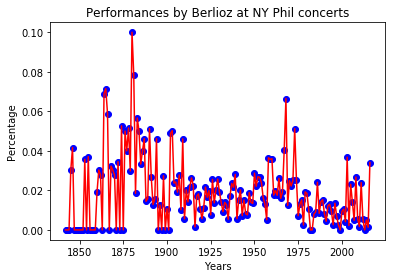

In [5]:
plt.plot(seasons_float, percentage_list,'bo')
plt.title("Performances by {} at NY Phil concerts".format(composer))
plt.ylabel("Percentage")
plt.xlabel("Years")
x, y = seasons_float, percentage_list

plt.rcParams["figure.figsize"] = (30, 9) # (w, h)
plt.plot(x,y,'r-')
plt.savefig(path_to_data + "/graphs/" + composer + ".png")

##### (optional)

Save to file for sonification.

In [7]:
d = dict()

for i in range(len(percentage_list)):
    d[seasons[i]] = percentage_list[i]

comp_df = pd.DataFrame.from_dict(d, orient='index')

comp_df.to_csv('data/to_sonify/' + composer + '.csv')

#### ...in which seasons the composer was most performed?

In [8]:
sorted_dict_percentage = sorted(percentage_dict.items(), key=lambda kv: kv[1])

sorted_dict_percentage.reverse()

sorted_dict_percentage

[(1880.0, 0.1),
 (1881.0, 0.0784313725490196),
 (1865.0, 0.07142857142857142),
 (1864.0, 0.06896551724137931),
 (1968.0, 0.06647398843930635),
 (1866.0, 0.058823529411764705),
 (1883.0, 0.05660377358490566),
 (1874.0, 0.05263157894736842),
 (1878.0, 0.05154639175257732),
 (1973.0, 0.05128205128205128),
 (1890.0, 0.05128205128205128),
 (1903.0, 0.05025125628140704),
 (1884.0, 0.05),
 (1876.0, 0.05),
 (1902.0, 0.04878048780487805),
 (1894.0, 0.046153846153846156),
 (1887.0, 0.046153846153846156),
 (1909.0, 0.046052631578947366),
 (1846.0, 0.041666666666666664),
 (1967.0, 0.04028436018957346),
 (1886.0, 0.04),
 (1877.0, 0.04),
 (1855.0, 0.037037037037037035),
 (2003.0, 0.0367816091954023),
 (1958.0, 0.0364963503649635),
 (1960.0, 0.03600654664484452),
 (1959.0, 0.03571428571428571),
 (1853.0, 0.03571428571428571),
 (1872.0, 0.034482758620689655),
 (2016.0, 0.0340632603406326),
 (1885.0, 0.03333333333333333),
 (1868.0, 0.03225806451612903),
 (1869.0, 0.030303030303030304),
 (1861.0, 0.0303

## 2) Who was the most performed composer...

#### ... overall?

In [9]:
w_df.composerName.value_counts()[:20]

Beethoven,  Ludwig  van        4349
Wagner,  Richard               3967
Tchaikovsky,  Pyotr  Ilyich    3185
Mozart,  Wolfgang  Amadeus     2546
Brahms,  Johannes              2399
Strauss,  Richard              1528
Bach,  Johann  Sebastian       1298
Mendelssohn,  Felix            1243
Dvorak,  Antonín               1193
Schubert,  Franz               1089
Ravel,  Maurice                1055
Berlioz,  Hector               1047
Liszt,  Franz                   993
Traditional,                    947
Stravinsky,  Igor               939
Debussy,  Claude                919
Weber,  Carl  Maria Von         901
Schumann,  Robert               869
Strauss,  Johann, II            865
Haydn,  Franz  Joseph           762
Name: composerName, dtype: int64

##### ... in each season?

In [10]:
seasons = w_df['season'].value_counts().index.tolist()
seasons.sort()

most_perf_by_season = {} #year: composer

for i in range(len(seasons)):
    #New DataFrame with just the rows containing season XXXX
    df_season = w_df[w_df.season == seasons[i]]
    most_perf_by_season[seasons[i][:-3]] = df_season.composerName.value_counts().index[0]
    
most_perf_by_season

{'1842': 'Beethoven,  Ludwig  van',
 '1843': 'Weber,  Carl  Maria Von',
 '1844': 'Donizetti,  Gaetano',
 '1845': 'Mendelssohn,  Felix',
 '1846': 'Beethoven,  Ludwig  van',
 '1847': 'Mendelssohn,  Felix',
 '1848': 'Weber,  Carl  Maria Von',
 '1849': 'Mendelssohn,  Felix',
 '1850': 'Mendelssohn,  Felix',
 '1851': 'Mendelssohn,  Felix',
 '1852': 'Mendelssohn,  Felix',
 '1853': 'Spohr,  Louis',
 '1854': 'Beethoven,  Ludwig  van',
 '1855': 'Mendelssohn,  Felix',
 '1856': 'Beethoven,  Ludwig  van',
 '1857': 'Mozart,  Wolfgang  Amadeus',
 '1858': 'Beethoven,  Ludwig  van',
 '1859': 'Beethoven,  Ludwig  van',
 '1860': 'Schumann,  Robert',
 '1861': 'Beethoven,  Ludwig  van',
 '1862': 'Beethoven,  Ludwig  van',
 '1863': 'Beethoven,  Ludwig  van',
 '1864': 'Beethoven,  Ludwig  van',
 '1865': 'Mendelssohn,  Felix',
 '1866': 'Mozart,  Wolfgang  Amadeus',
 '1867': 'Mendelssohn,  Felix',
 '1868': 'Beethoven,  Ludwig  van',
 '1869': 'Beethoven,  Ludwig  van',
 '1870': 'Beethoven,  Ludwig  van',
 '1871

##### ... in most seasons?

In [11]:
from collections import Counter

x = Counter(most_perf_by_season.values())

x.most_common

<bound method Counter.most_common of Counter({'Beethoven,  Ludwig  van': 69, 'Wagner,  Richard': 39, 'Mozart,  Wolfgang  Amadeus': 14, 'Tchaikovsky,  Pyotr  Ilyich': 12, 'Mendelssohn,  Felix': 9, 'Brahms,  Johannes': 5, 'Stravinsky,  Igor': 4, 'Schumann,  Robert': 3, 'Dvorak,  Antonín': 3, 'Weber,  Carl  Maria Von': 2, 'Anthem,': 2, 'Copland,  Aaron': 2, 'Donizetti,  Gaetano': 1, 'Spohr,  Louis': 1, 'Pirani,  Eugenio  di': 1, 'Berlioz,  Hector': 1, 'Liszt,  Franz': 1, 'Gershwin,  George': 1, 'Schubert,  Franz': 1, 'Strauss,  Johann, II': 1, 'Ravel,  Maurice': 1, 'Strauss,  Richard': 1, 'Sibelius,  Jean': 1})>

## 3) For each season...

#### ... what was the percentage of living composers being performed?

In [12]:
living_df = pd.read_csv('data/works_composer_living.csv')

In [13]:
seasons = w_df['season'].value_counts().index.tolist()
seasons.sort() #list of all seasons

dict_living = {}

for i in range(len(seasons)):
    df_season = living_df[w_df.season == seasons[i]]
    is_living = df_season.living.value_counts()
    
    dict_living[int(seasons[i][:4])] = (is_living['Y'], is_living['N'], len(df_season) - is_living['Y'] - is_living['N'])

list_alive = [v for v in dict_living.values()]
percentages_alive = []

for season in list_alive:
    percentages_alive.append(season[0] / (season[0] + season[1]) * 100)

In [14]:
# How many performances do we not know if the composer was alive?
unknown = 0
total = len(living_df)

for k, v in dict_living.items():
    unknown += v[2]
    
print("Unknown: " + str(unknown))
print("Total performances: " + str(len(living_df)))
print("Percentage of unknown: " + str(unknown * 100 / len(living_df)))

Unknown: 3045
Total performances: 63185
Percentage of unknown: 4.819181767824642


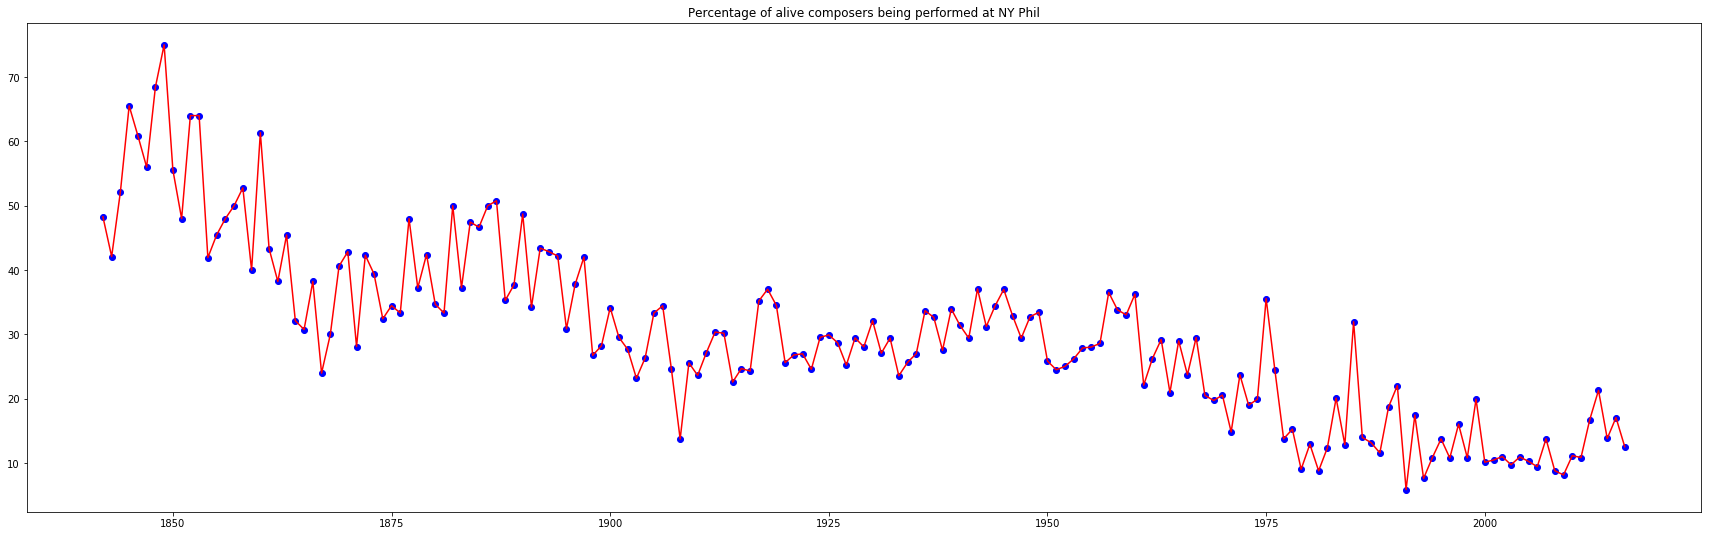

In [15]:
plt.plot(seasons_float, percentages_alive,'bo')

x, y = seasons_float, percentages_alive

plt.rcParams["figure.figsize"] = (30, 9) # (w, h)
plt.title("Percentage of alive composers being performed at NY Phil")
plt.plot(x,y,'r-')
plt.savefig("data/graphs/alive.png")

##### Write to file for sonification

In [16]:
to_file = dict()

for k,v in dict_living.items():
    
    to_file[k] = (v[0] / (v[0] + v[1]) )

to_file_df = pd.DataFrame.from_dict(to_file, orient='index')

to_file_df.to_csv('data/to_sonify/alive.csv')

#### ... is either Beethoven, Wagner, or Mozart the most performed composer?

<em>1: Beethoven
0.5: Wagner
1.5: Mozart</em>

These numbers will be used for sonification and have an acustic significance.

In [17]:
seasons = w_df['season'].value_counts().index.tolist()
seasons.sort() #list of all seasons

In [18]:
dict_BorW = {}

for i in range(len(seasons)):
    df_season = w_df[w_df.season == seasons[i]]
    comp = df_season.composerName.value_counts().index[0]

    if comp == 'Beethoven,  Ludwig  van':
        dict_BorW[int(seasons[i][:4])] = 1
    elif comp == 'Wagner,  Richard':
        dict_BorW[int(seasons[i][:4])] = 0.5
    elif comp == 'Mozart,  Wolfgang  Amadeus':
        dict_BorW[int(seasons[i][:4])] = 1.5
    else:
        dict_BorW[int(seasons[i][:4])] = 0

list_BW = [v for v in dict_BorW.values()]      

In [19]:
#write to file. Rows = years, columns = percentage

dict_comp_df = pd.DataFrame.from_dict(dict_BorW, orient='index')

dict_comp_df.to_csv('data/to_sonify/BWM.csv')